In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
cd 'gdrive/MyDrive/cs182-final-proj'

/content/gdrive/MyDrive/cs182-final-proj


In [3]:
!pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=050b117cc60b255dd2af6e61e1ed4f96d3f6ad6428d65c80d28d0df0386102b2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from mpl_toolkits.mplot3d import Axes3D


# Toy Example

In [5]:
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']
embeddings = model.encode(sentences)


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [6]:
embeddings

array([[-0.01371736, -0.04285152, -0.01562859, ...,  0.10017824,
         0.12365721, -0.04229669],
       [ 0.05645248,  0.05500238,  0.03137964, ...,  0.06650875,
         0.08491524, -0.0332849 ],
       [ 0.04393357,  0.05893441,  0.04817837, ...,  0.05216278,
         0.05610648,  0.10206395]], dtype=float32)

# Creating embeddings for our training data

In [7]:
ls

archive.zip                                       left.txt
Articles.txt                                      left_validation.png
cached_lm_GPT2Tokenizer_128_left.txt              left_val.txt
cached_lm_GPT2Tokenizer_128_left.txt.lock         left-weights/
cached_lm_GPT2Tokenizer_128_left_val.txt          model_save/
cached_lm_GPT2Tokenizer_128_left_val.txt.lock     models_saves/
cached_lm_GPT2Tokenizer_128_neutral.txt           neutral_train.png
cached_lm_GPT2Tokenizer_128_neutral.txt.lock      neutral.txt
cached_lm_GPT2Tokenizer_128_neutral_val.txt       neutral_validation.png
cached_lm_GPT2Tokenizer_128_neutral_val.txt.lock  neutral_val.txt
cached_lm_GPT2Tokenizer_128_right.txt             neutral-weights/
cached_lm_GPT2Tokenizer_128_right.txt.lock        output.csv
cached_lm_GPT2Tokenizer_128_right_val.txt         output.gsheet
cached_lm_GPT2Tokenizer_128_right_val.txt.lock    right_train.png
combined_data.csv                                 right.txt
combined_data.gsheet           

In [8]:
data_df = pd.read_csv('combined_data.csv')

In [9]:
data_with_embeddings = data_df.copy()
text_embedding = model.encode(list(data_df['text']))

In [10]:
text_embedding.shape

(3682, 384)

In [11]:
text_embedding

array([[ 0.00704148, -0.0301303 , -0.04435366, ..., -0.05444058,
         0.05921534,  0.00155113],
       [ 0.10417514, -0.00156552, -0.02994591, ..., -0.03375115,
        -0.00558799, -0.00082398],
       [ 0.00075027,  0.03847636, -0.10373062, ..., -0.00238173,
         0.11514881,  0.00127083],
       ...,
       [ 0.0509608 , -0.00226239,  0.02425111, ...,  0.00428433,
        -0.00899089,  0.07252099],
       [ 0.03663087,  0.041967  , -0.01943853, ...,  0.0192966 ,
        -0.06609506, -0.00291118],
       [ 0.0382104 ,  0.09012376, -0.00053149, ..., -0.02986898,
         0.0155114 , -0.07037632]], dtype=float32)

In [12]:
data_with_embeddings['embeddings'] = text_embedding.tolist()

In [13]:
data_with_embeddings.to_csv('combined_data_with_embeddings.csv')

# PCA analysis

In [14]:
expanded_columns = pd.DataFrame(data_with_embeddings['embeddings'].tolist(), columns=[f'X{i}' for i in range(len(data_with_embeddings['embeddings'][0]))])
data_with_embeddings_expanded = pd.concat([data_with_embeddings, expanded_columns], axis= 1)

In [15]:
data_with_embeddings_expanded_truncated = data_with_embeddings_expanded[[f'X{i}' for i in range(len(data_with_embeddings['embeddings'][0]))] + ['type']]







In [16]:
data_with_embeddings_expanded_truncated

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X375,X376,X377,X378,X379,X380,X381,X382,X383,type
0,0.007041,-0.030130,-0.044354,-0.016915,0.058667,0.034401,-0.100423,-0.071921,-0.032756,0.018937,...,0.056485,0.004152,0.011612,0.031171,0.070559,0.054114,-0.054441,0.059215,0.001551,center
1,0.104175,-0.001566,-0.029946,-0.010663,0.017916,0.029785,-0.076181,-0.047158,0.015871,0.000117,...,0.045490,0.027277,0.037310,0.026161,0.069467,-0.004642,-0.033751,-0.005588,-0.000824,left
2,0.000750,0.038476,-0.103731,0.037185,0.070729,0.029850,-0.099637,-0.059078,-0.070012,0.110827,...,-0.011829,0.071493,-0.047784,0.025679,0.076568,0.053040,-0.002382,0.115149,0.001271,right
3,0.007955,0.058384,0.073151,0.018502,0.091555,-0.008293,0.065197,-0.038102,-0.088556,-0.048625,...,-0.096781,0.019590,-0.017678,-0.074056,-0.045598,-0.037046,-0.029334,0.016569,0.042236,left
4,0.043323,-0.046877,0.007786,0.017373,0.006143,0.009960,-0.106317,-0.058113,-0.067291,-0.037846,...,-0.016851,0.048594,0.002650,-0.025597,0.009103,-0.012812,-0.021666,0.067312,0.011962,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,0.050388,0.034596,0.078191,-0.014841,0.101741,-0.058550,0.010466,-0.012632,0.021008,-0.088345,...,-0.035136,-0.021526,0.002684,0.062899,0.014527,-0.006232,0.031586,0.079083,-0.048447,left
3678,0.095195,0.040634,0.013533,0.042913,-0.037288,0.006045,-0.019562,-0.133432,-0.015102,-0.092814,...,-0.030161,0.053550,-0.063575,0.025306,-0.022557,0.017764,0.044573,-0.028769,-0.004294,NaN
3679,0.050961,-0.002262,0.024251,0.097738,0.065581,0.046830,-0.050065,-0.046077,0.006282,0.044364,...,0.014369,-0.031429,-0.042181,-0.042261,0.013516,0.028590,0.004284,-0.008991,0.072521,NaN
3680,0.036631,0.041967,-0.019439,0.036394,0.012457,-0.040488,-0.028249,-0.107045,-0.062857,0.037033,...,-0.132220,0.057853,-0.059903,0.032564,-0.088004,0.046937,0.019297,-0.066095,-0.002911,NaN


In [17]:
center_embeddings = data_with_embeddings_expanded_truncated[data_with_embeddings_expanded_truncated['type']=='center']
right_embeddings = data_with_embeddings_expanded_truncated[data_with_embeddings_expanded_truncated['type'] == 'right']
left_embeddings = data_with_embeddings_expanded_truncated[data_with_embeddings_expanded_truncated['type']=='left']

In [18]:
center_embeddings

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X375,X376,X377,X378,X379,X380,X381,X382,X383,type
0,0.007041,-0.030130,-0.044354,-0.016915,0.058667,0.034401,-0.100423,-0.071921,-0.032756,0.018937,...,0.056485,0.004152,0.011612,0.031171,0.070559,0.054114,-0.054441,0.059215,0.001551,center
5,-0.022851,0.007856,0.013187,-0.001340,0.123223,0.045272,0.068733,0.073309,-0.003106,0.097606,...,0.011930,-0.079572,-0.039002,0.060738,-0.037225,0.117596,-0.024066,0.067422,0.148397,center
8,0.035141,-0.036666,-0.001163,-0.002841,0.044224,-0.003311,-0.055538,-0.073518,0.025240,-0.052999,...,-0.019099,0.058132,-0.071332,-0.002137,-0.026079,0.053747,0.033268,0.112612,0.042738,center
17,0.003931,0.042187,0.128660,0.009664,0.028284,-0.022104,0.004893,-0.044707,0.047454,-0.039734,...,0.103595,0.036306,-0.051854,0.015941,0.025386,0.009088,0.020265,-0.063742,0.050607,center
19,0.061667,0.000966,-0.031503,0.066022,0.046642,0.105832,0.026858,-0.032538,0.007044,-0.028047,...,0.058648,0.050563,0.023688,-0.014384,-0.006047,0.010739,0.039473,0.034189,-0.025969,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,0.034042,0.010349,-0.049296,0.048924,0.015843,0.047943,0.029442,-0.042356,-0.044982,-0.070646,...,0.106159,0.063013,-0.052136,-0.080917,0.019703,0.007190,-0.031549,0.020722,-0.009567,center
3638,0.017933,0.038221,0.080240,-0.017855,0.014864,-0.039633,0.009735,-0.001002,-0.065782,-0.047231,...,-0.107203,-0.072108,0.021692,-0.085258,-0.086258,0.035486,-0.004810,0.048264,-0.035154,center
3639,0.061735,0.077295,0.032443,-0.090068,0.072253,0.036361,0.018642,-0.031543,0.061832,0.041081,...,0.014073,-0.041122,-0.038077,-0.067779,-0.029705,0.104989,0.015239,-0.042834,0.052302,center
3650,-0.007028,0.140387,-0.031116,0.021637,-0.077028,0.007926,0.092987,-0.066943,0.039499,-0.032581,...,-0.114163,0.040168,0.009158,-0.012663,-0.016155,-0.047405,-0.082821,-0.040916,0.012911,center


In [19]:
right_embeddings

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X375,X376,X377,X378,X379,X380,X381,X382,X383,type
2,0.000750,0.038476,-0.103731,0.037185,0.070729,0.029850,-0.099637,-0.059078,-0.070012,0.110827,...,-0.011829,0.071493,-0.047784,0.025679,0.076568,0.053040,-0.002382,0.115149,0.001271,right
4,0.043323,-0.046877,0.007786,0.017373,0.006143,0.009960,-0.106317,-0.058113,-0.067291,-0.037846,...,-0.016851,0.048594,0.002650,-0.025597,0.009103,-0.012812,-0.021666,0.067312,0.011962,right
13,0.078819,-0.057441,-0.073536,-0.031940,0.042858,-0.018568,-0.001216,0.023795,-0.058439,0.039570,...,-0.025259,-0.034223,-0.002892,0.096481,-0.043024,0.061489,0.049037,-0.001499,-0.029855,right
14,-0.069450,-0.007471,-0.001175,-0.051304,0.048901,0.033513,0.044205,-0.076844,-0.022591,0.036740,...,-0.054487,-0.021756,-0.035773,-0.059083,0.021876,0.057692,0.016467,-0.015511,0.049596,right
16,0.041640,0.042310,-0.078235,0.018986,0.098020,-0.018121,0.060567,-0.045516,0.046425,0.057535,...,0.052876,-0.022774,-0.019361,-0.022043,0.038593,0.107072,-0.037556,0.043888,0.002747,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,-0.016026,-0.001737,0.019432,-0.007267,0.077310,0.057171,-0.008956,-0.042201,-0.113902,0.009340,...,0.052964,-0.001834,-0.013622,-0.030052,0.019950,0.011618,-0.034751,0.003407,0.028430,right
3668,-0.083929,-0.018673,-0.056066,-0.021882,-0.077980,-0.025011,-0.025652,-0.069906,-0.017300,0.004918,...,-0.045508,0.057460,0.053075,-0.008230,-0.008260,-0.018702,-0.042376,0.096756,-0.038712,right
3670,0.011589,0.020177,0.002527,0.050473,0.028525,-0.080524,0.045104,-0.031842,-0.150775,-0.086479,...,-0.061432,-0.002313,-0.027235,-0.047998,-0.007596,0.024158,-0.032715,0.014865,-0.089308,right
3671,0.135314,-0.024662,0.034146,0.115234,-0.009202,-0.026847,-0.029066,-0.091054,-0.046689,-0.015522,...,-0.026641,0.022528,0.063247,0.031423,0.034075,0.116967,0.023642,0.038226,0.025753,right


In [20]:
left_embeddings

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X375,X376,X377,X378,X379,X380,X381,X382,X383,type
1,0.104175,-0.001566,-0.029946,-0.010663,0.017916,0.029785,-0.076181,-0.047158,0.015871,0.000117,...,0.045490,0.027277,0.037310,0.026161,0.069467,-0.004642,-0.033751,-0.005588,-0.000824,left
3,0.007955,0.058384,0.073151,0.018502,0.091555,-0.008293,0.065197,-0.038102,-0.088556,-0.048625,...,-0.096781,0.019590,-0.017678,-0.074056,-0.045598,-0.037046,-0.029334,0.016569,0.042236,left
6,0.039226,0.020489,0.089406,0.065009,0.071163,-0.016974,-0.032156,-0.088122,-0.087703,0.011463,...,-0.029444,0.018134,-0.009261,-0.008554,-0.038928,-0.028928,0.039473,-0.071205,0.035897,left
7,0.081141,0.009010,0.096251,0.054100,0.025478,-0.034839,-0.036252,-0.103552,-0.011449,-0.064127,...,-0.025710,-0.031035,-0.030292,0.036764,-0.061803,0.018734,0.002975,-0.020683,0.030093,left
9,0.087889,0.004612,0.001581,-0.016101,0.010505,-0.050067,-0.006745,-0.025915,0.062736,0.035942,...,-0.000365,0.022967,-0.040288,-0.042998,-0.048260,0.042847,-0.118817,0.077475,-0.010794,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,0.030402,-0.028422,0.008369,-0.058104,-0.005127,-0.038701,-0.013883,-0.035315,-0.010761,-0.053812,...,-0.015953,0.058666,-0.013251,-0.022942,-0.048608,0.034258,-0.131748,0.064069,0.007697,left
3653,0.096554,-0.059083,0.057424,0.015526,0.069842,0.000169,0.010317,0.024999,-0.035954,-0.058370,...,0.049375,0.017520,0.005715,-0.081533,-0.002157,0.009388,-0.051632,0.137290,0.080732,left
3662,-0.059014,0.004416,0.080582,-0.012690,-0.053463,-0.041907,0.045866,0.008029,-0.019575,-0.102892,...,0.040589,0.020870,-0.010881,-0.055506,-0.082307,-0.001281,0.086921,0.047329,0.030392,left
3669,0.122355,0.038885,0.016533,-0.024177,0.009299,-0.023916,-0.028264,-0.081241,-0.033877,-0.050398,...,0.015291,0.017340,0.060757,0.036481,0.000042,0.125216,-0.003695,0.131495,0.095487,left


In [21]:
import pandas as pd
from sklearn.decomposition import PCA
def apply_pca(df, n_components=2):
    """
    Perform PCA on the given DataFrame and return a new DataFrame with reduced dimensions.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - n_components (int): The number of components to retain after PCA.

    Returns:
    - pd.DataFrame: A new DataFrame with reduced dimensions.
    """
    # Extract numerical columns from the DataFrame
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Create a DataFrame with only numerical columns
    df_numerical = df[numerical_columns]

    # Standardize the data (optional but recommended for PCA)
    standardized_data = (df_numerical - df_numerical.mean()) / df_numerical.std()

    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)
    print(standardized_data.shape)
    # Fit and transform the data
    reduced_dimensions = pca.fit_transform(standardized_data)
    print(reduced_dimensions.shape)
    # Create a new DataFrame with reduced dimensions
    df_reduced = pd.DataFrame(reduced_dimensions, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    print(df_reduced.shape)
    # Concatenate non-numerical columns (if any) with the reduced DataFrame
#     df_non_numerical = df.drop(columns=numerical_columns)
#     print(df_non_numerical.shape)
#     df_final = pd.concat([df_non_numerical, df_reduced], axis=1)
#     print(df_final.shape)
    return df_reduced


In [22]:
reduced_dimension_center_embeddings = apply_pca(center_embeddings,3)
reduced_dimension_right_embeddings = apply_pca(right_embeddings,3)
reduced_dimension_left_embeddings = apply_pca(left_embeddings, 3)

(692, 384)
(692, 3)
(692, 3)
(997, 384)
(997, 3)
(997, 3)
(994, 384)
(994, 3)
(994, 3)


In [23]:
reduced_dimension_center_embeddings

,PC1,PC2,PC3
0,1.034889,0.284029,1.334319
1,0.151253,-3.430748,4.607011
2,-1.077748,2.100624,-0.311324
3,0.988103,6.964114,2.168582
4,0.922125,-1.036197,-3.675923
...,...,...,...
687,1.273194,1.845808,5.969889
688,-5.687358,2.329054,-4.638455
689,4.280199,4.978277,-0.209290
690,3.370899,4.839449,-0.022636


In [24]:
reduced_dimension_right_embeddings

,PC1,PC2,PC3
0,-2.676574,6.478476,5.062079
1,-2.409035,4.083196,-7.354834
2,2.931937,3.907891,-9.234752
3,0.885671,-0.324280,0.551737
4,4.181646,2.040633,6.215541
...,...,...,...
992,-0.567668,2.313356,-1.313741
993,-3.188474,-0.404938,3.916754
994,-3.141007,-7.026861,-2.299117
995,-0.825586,0.172067,-2.187865


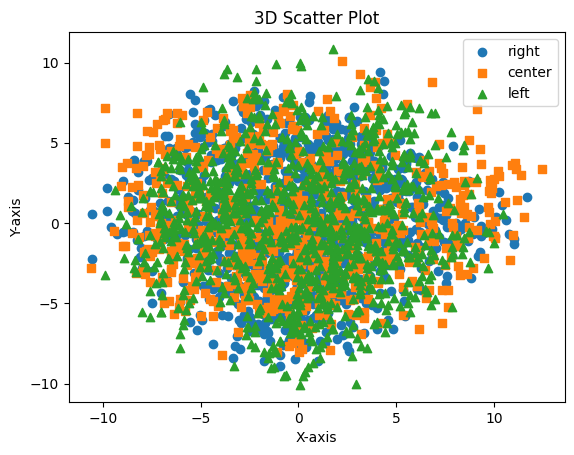

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Scatter plot for each DataFrame
ax.scatter(reduced_dimension_right_embeddings['PC1'], reduced_dimension_right_embeddings['PC2'], label='right', marker='o')
ax.scatter(reduced_dimension_center_embeddings['PC1'], reduced_dimension_center_embeddings['PC2'], label='center', marker='s')
ax.scatter(reduced_dimension_left_embeddings['PC1'], reduced_dimension_left_embeddings['PC2'], label='left', marker='^')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
#ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot')

# Add legend
ax.legend()

# Show the plot
plt.show()

# Example

In [26]:
center_embeddings

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X375,X376,X377,X378,X379,X380,X381,X382,X383,type
0,0.007041,-0.030130,-0.044354,-0.016915,0.058667,0.034401,-0.100423,-0.071921,-0.032756,0.018937,...,0.056485,0.004152,0.011612,0.031171,0.070559,0.054114,-0.054441,0.059215,0.001551,center
5,-0.022851,0.007856,0.013187,-0.001340,0.123223,0.045272,0.068733,0.073309,-0.003106,0.097606,...,0.011930,-0.079572,-0.039002,0.060738,-0.037225,0.117596,-0.024066,0.067422,0.148397,center
8,0.035141,-0.036666,-0.001163,-0.002841,0.044224,-0.003311,-0.055538,-0.073518,0.025240,-0.052999,...,-0.019099,0.058132,-0.071332,-0.002137,-0.026079,0.053747,0.033268,0.112612,0.042738,center
17,0.003931,0.042187,0.128660,0.009664,0.028284,-0.022104,0.004893,-0.044707,0.047454,-0.039734,...,0.103595,0.036306,-0.051854,0.015941,0.025386,0.009088,0.020265,-0.063742,0.050607,center
19,0.061667,0.000966,-0.031503,0.066022,0.046642,0.105832,0.026858,-0.032538,0.007044,-0.028047,...,0.058648,0.050563,0.023688,-0.014384,-0.006047,0.010739,0.039473,0.034189,-0.025969,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,0.034042,0.010349,-0.049296,0.048924,0.015843,0.047943,0.029442,-0.042356,-0.044982,-0.070646,...,0.106159,0.063013,-0.052136,-0.080917,0.019703,0.007190,-0.031549,0.020722,-0.009567,center
3638,0.017933,0.038221,0.080240,-0.017855,0.014864,-0.039633,0.009735,-0.001002,-0.065782,-0.047231,...,-0.107203,-0.072108,0.021692,-0.085258,-0.086258,0.035486,-0.004810,0.048264,-0.035154,center
3639,0.061735,0.077295,0.032443,-0.090068,0.072253,0.036361,0.018642,-0.031543,0.061832,0.041081,...,0.014073,-0.041122,-0.038077,-0.067779,-0.029705,0.104989,0.015239,-0.042834,0.052302,center
3650,-0.007028,0.140387,-0.031116,0.021637,-0.077028,0.007926,0.092987,-0.066943,0.039499,-0.032581,...,-0.114163,0.040168,0.009158,-0.012663,-0.016155,-0.047405,-0.082821,-0.040916,0.012911,center


In [76]:
df = pd.read_csv("output.csv")
print(df)

         label     score      actual  \
0       Biased  0.994794        left   
1       Biased  0.990567        left   
2       Biased  0.983146        left   
3       Biased  0.715361        left   
4       Biased  0.989321        left   
5       Biased  0.807756        left   
6       Biased  0.690887        left   
7       Biased  0.933919       right   
8       Biased  0.541714       right   
9       Biased  0.952421       right   
10      Biased  0.986004       right   
11      Biased  0.955005       right   
12      Biased  0.924353       right   
13      Biased  0.531730       right   
14  Non-biased  0.629724  Non-biased   
15      Biased  0.979240  Non-biased   
16      Biased  0.706029  Non-biased   
17      Biased  0.608087  Non-biased   
18      Biased  0.908907  Non-biased   
19  Non-biased  0.551714  Non-biased   
20      Biased  0.849178  Non-biased   

                                                 text  
0   abortion, but a Democratic majority in the Hou...  
1   gun

In [77]:
numerical_columns = [f'X{i}' for i in range(len(data_with_embeddings['embeddings'][0]))]

In [78]:
left_centeroid_vector = np.mean(left_embeddings[numerical_columns], axis = 0)*1000
right_centroid_vector = np.mean(right_embeddings[numerical_columns], axis = 0)*1000
center_centroid_vector = np.mean(center_embeddings[numerical_columns], axis = 0)*1000
#generated_output = 'The president-elect is now taking a more aggressive stance on infrastructure, calling on the federal government to invest in infrastructure to help pay for infrastructure.'


In [79]:
dfr = []
dfl = []
dfc = []
embed_class = []
for index, row in df.iterrows():
  generated_text = row["text"]

  generated_text_embedding = model.encode(generated_text)*1000
  distance_from_right_centroid = np.linalg.norm(generated_text_embedding-right_centroid_vector)
  distance_from_left_centroid = np.linalg.norm(generated_text_embedding - left_centeroid_vector)
  distance_from_center_centroid = np.linalg.norm(generated_text_embedding - center_centroid_vector)

  dfr.append(distance_from_right_centroid)
  dfl.append(distance_from_left_centroid)
  dfc.append(distance_from_center_centroid)

  min_dist = min(distance_from_center_centroid, distance_from_left_centroid, distance_from_right_centroid)

  if min_dist == distance_from_center_centroid:
    print("center")
    embed_class.append("center")
  elif min_dist == distance_from_left_centroid:
    print("left")
    embed_class.append("left")
  elif min_dist == distance_from_right_centroid:
    print("right")
    embed_class.append("right")




left
left
left
left
right
left
right
right
left
right
right
right
left
right
center
left
left
left
left
left
center


In [80]:
concat = {'distance_from_left_centroid': dfl, 'distance_from_right_centroid': dfr, 'distance_from_center_centroid': dfc, "embedding_classification": embed_class}
concat_df = pd.DataFrame(concat)

In [81]:
df = pd.concat([df, concat_df], axis=1)


In [82]:
df

,label,score,actual,text,distance_from_left_centroid,distance_from_right_centroid,distance_from_center_centroid,embedding_classification
0,Biased,0.994794,left,"abortion, but a Democratic majority in the Hou...",834.985478,857.759504,878.735816,left
1,Biased,0.990567,left,guns in the first place to prevent the spread ...,854.353382,883.250668,887.920683,left
2,Biased,0.983146,left,affirmative action to stop people from getting...,859.505148,870.210100,869.732938,left
3,Biased,0.715361,left,atheism” and the enomic task of mmitigating th...,930.163004,940.508528,951.432441,left
4,Biased,0.989321,left,foreign aid program that had been starved of m...,861.424215,859.112619,902.292311,right
5,Biased,0.807756,left,Trump is making the case that ntrol of illegal...,850.042961,877.886729,896.331396,left
6,Biased,0.690887,left,Biden’s office had long pushed to have the mea...,814.348856,805.014897,854.502344,right
7,Biased,0.933919,right,abortion the death penalty was used to prosecu...,934.819216,929.360988,938.838945,right
8,Biased,0.541714,right,guns also allow a person to smuggle a firearm ...,793.444913,804.461764,818.677500,left
9,Biased,0.952421,right,affirmative action” and ensuring women make eq...,896.279047,882.365798,905.300348,right


In [60]:
distnace_from_right_centroid

863.0101001770104

In [61]:
distance_from_left_centroid

857.9126642695567

In [62]:
distance_from_center_centroid

844.8268328174648

# New embeddings using articles

In [38]:
articles_data = pd.read_csv('./data/final_labels_MBIC.csv', sep =';')
# data_with_new_embeddings = data_df.copy()
# new_text_embedding = model.encode(list(data_df['text']))
articles_data['article'][0]


"YouTube says no ‘deepfakes’ or ‘birther’ videos with toughened 2020 election stance\nYouTube is making clear there will be no “birtherism” on its platform during this year’s U.S. presidential election – a belated response to a type of conspiracy theory more prevalent in the 2012 race.\nThe Google-owned video service is also reiterating that it won’t allow election-related “deepfake” videos and anything that aims to mislead viewers about voting procedures and how to participate in the 2020 census.\nYouTube clarified its rules ahead of the Iowa caucuses Monday. The company is mostly reiterating content guidelines that it has been putting in place since the last presidential election in 2016.\nIts ban on technically manipulated videos of political figures was made apparent last year when YouTube became the first major platform to remove a doctored video of House Speaker Nancy Pelosi. But the announcement Monday further clarifies that it will take down any election-related videos that are

TypeError: ignored

In [84]:
classifier_correct = 0
embedding_correct = 0
for index, row in df.iterrows():
  if row["label"] == "Biased" and (row["actual"]== "left" or row["actual"] == "right"):
    classifier_correct +=1
  elif row["label"] == row["actual"]:
    classifier_correct+=1

  if row["embedding_classification"] == row["actual"]:
    embedding_correct+=1

  if row['embedding_classification'] == "center" and row["actual"] == "Non-biased":
    embedding_correct+=1


print(classifier_correct, embedding_correct)




16 12


In [85]:
classifier_acc = classifier_correct/len(df['actual'])
embedding_acc = embedding_correct/len(df['actual'])

In [86]:
print(classifier_acc, embedding_acc)

0.7619047619047619 0.5714285714285714
